In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import FID_util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_diffusion_image/"

## Data Sets

In [2]:
CIFAR_train_loader = DataLoader(datasets.CIFAR10('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True)

CIFAR_train = FID_util.load_data_single(CIFAR_train_loader, 10000, (32, 32))
CIFAR_generated = FID_util.load_from_dir("./diffusion_images/cifar_generated/*.png")
print(f"Base FID CIFAR-10: {FID_util.compute_FID(CIFAR_train, CIFAR_generated).item()}")

Files already downloaded and verified
Base FID CIFAR-10: 3.0108985900878906


In [3]:
CelebA_train = FID_util.load_from_dir("./data/celeba_hq_256/*.jpg", seed)
CelebA_generated = FID_util.load_from_dir("./diffusion_images/celebA_generated/*.png")
print(f"Base FID CelebA-HQ DDIM: {FID_util.compute_FID(CelebA_train, CelebA_generated, batch_num=125).item()}")
CelebA_ldm_generated = FID_util.load_from_dir("./diffusion_images/celebA_ldm_generated/*.png")
print(f"Base FID CelebA-HQ LDM: {FID_util.compute_FID(CelebA_train, CelebA_ldm_generated, batch_num=125).item()}")

Base FID CelebA-HQ: 26.680908203125


## Gamma Correction

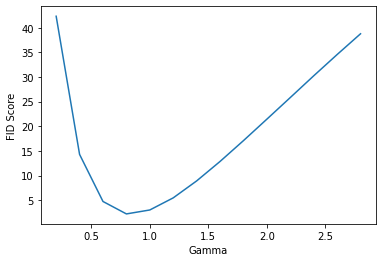

In [4]:
gamma_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CIFAR_train, CIFAR_generated)
plt.savefig(plot_path + "g_CIFAR_gamma_fid_scores")

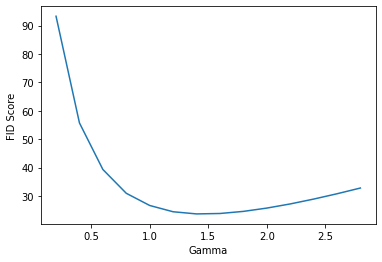

In [5]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CelebA_train, CelebA_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_gamma_fid_scores")

In [ ]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CelebA_train, CelebA_ldm_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_ldm_gamma_fid_scores")

## Image Saturation

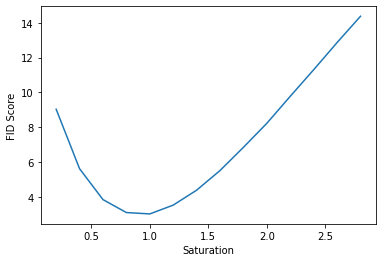

In [6]:
level_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", CIFAR_train, CIFAR_generated)
plt.savefig(plot_path + "g_CIFAR_saturation_fid_scores")

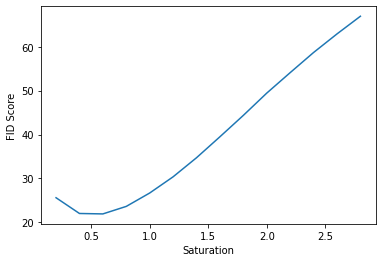

In [7]:
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", CelebA_train, CelebA_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_saturation_fid_scores")

In [ ]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_saturation, "Saturation", CelebA_train, CelebA_ldm_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_ldm_saturation_fid_scores")

In [ ]:
print(f"FID of Inverted CIFAR: {FID_util.invert_FID(CIFAR_train, CIFAR_generated)}")

In [ ]:
print(f"FID of Inverted CelebA DDIM: {FID_util.invert_FID(CIFAR_train, CelebA_generated, batch_num=125)}")

In [ ]:
print(f"FID of Inverted CelebA LDM: {FID_util.invert_FID(CIFAR_train, CelebA_ldm_generated, batch_num=125))}")

## Rotations

In [10]:
angles = [90, 180, 270]
for angle in angles:
    print(f"------- Rotation of {angle} degrees -------")
    print(f"CIFAR: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CIFAR_train, CIFAR_generated)}")
    print(f"CelebA DDIM: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CelebA_train, CelebA_generated, batch_num=125)}")
    print(f"CelebA LDM: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CelebA_train, CelebA_ldm_generated, batch_num=125)}")

------- Rotation of 90 degrees -------
CIFAR: 3.3034660816192627
CelebA: 28.593704223632812
------- Rotation of 180 degrees -------
CIFAR: 3.081232786178589
CelebA: 26.683610916137695
------- Rotation of 270 degrees -------
CIFAR: 3.2716546058654785
CelebA: 28.563152313232422


## Sectional Rotations

CIFAR: 2.276364803314209


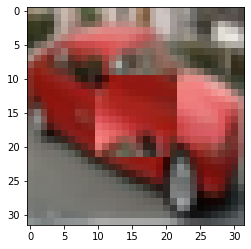

In [11]:
print(f"CIFAR: {FID_util.rotate_chunk((10, 10, 22, 22), CIFAR_train, CIFAR_generated)}")

CelebA: 25.117137908935547


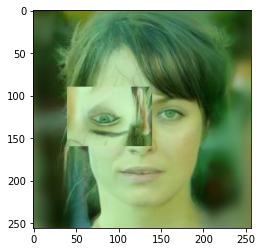

In [12]:
print(f"CelebA DDIM: {FID_util.rotate_chunk((40, 90, 140, 160), CelebA_train, CelebA_generated, batch_num=125)}")

In [ ]:
print(f"CelebA LDM: {FID_util.rotate_chunk((40, 90, 140, 160), CelebA_train, CelebA_ldm_generated, batch_num=125)}")

In [ ]:
FID_util.swap_chunks((5, 10, 10, 20), (20, 15, 25, 25), CIFAR_train, CIFAR_test)

25.52339744567871

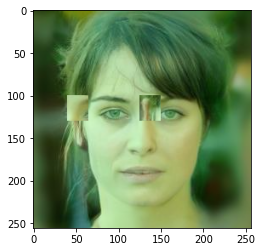

In [13]:
FID_util.swap_chunks((125, 100, 150, 130), (40, 100, 65, 130), CelebA_train, CelebA_generated, batch_num=125)

In [ ]:
FID_util.swap_chunks((125, 100, 150, 130), (40, 100, 65, 130), CelebA_train, CelebA_ldm_generated, batch_num=125)

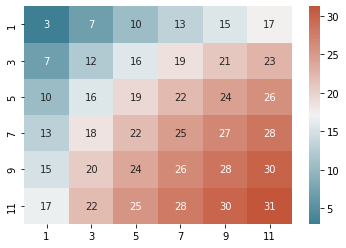

In [14]:
FID_util.generate_heatmap(CIFAR_train, CIFAR_generated, plot_path + "g_CIFAR_blurring_fid")

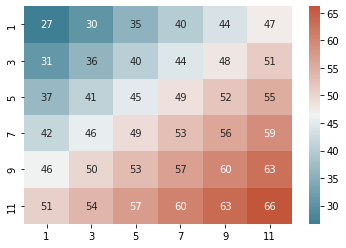

In [15]:
FID_util.generate_heatmap(CelebA_train, CelebA_generated, plot_path + "g_CelebA_blurring_fid")

In [ ]:
FID_util.generate_heatmap(CelebA_train, CelebA_ldm_generated, plot_path + "g_CelebA_ldm_blurring_fid")

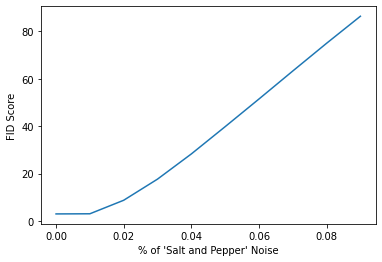

In [16]:
percentages = np.arange(0, 0.1, 0.01)
noise_FID_results = [FID_util.noisify_FID(p, CIFAR_train, CIFAR_generated, seed=seed) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "g_CIFAR_Noise_fid_scores")

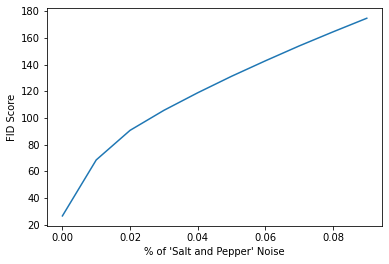

In [17]:
noise_FID_results = [FID_util.noisify_FID(p, CelebA_train, CelebA_generated, seed=seed, batch_num=125) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "g_CelebA_Noise_fid_scores")

In [ ]:
noise_FID_results = [FID_util.noisify_FID(p, CelebA_train, CelebA_ldm_generated, seed=seed, batch_num=125) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "g_CelebA_ldm_Noise_fid_scores")